## Knock Airport Weather

Data link for Knock Airport Weather CSV. https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

**Class Notes:** Topic 6 (More Pandas) -  Datetime and Timeseries.

Import Libraries

In [318]:
# Python libraries

import pandas as pd # for data manipulation and analysis.
import datetime # for manipulating date and times
import numpy as np # for numerical operations on arrays.
import seaborn as sns # for data visualisation
import matplotlib.pyplot as plt # for data visualisation an graph plotting.


### Load Data

In [319]:
# Load data and skip the first 23 rows.
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, low_memory=False)
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


### Data Cleaning

Checking for missing values and converting columns to appropriate formats.

In [320]:
# Assign blank cells(" ") to NAN values.
df.replace(r"^\s*$", np.nan, regex=True, inplace=True)

In [321]:
# Check for missing data.
print(df.isna().sum())

date         0
ind          0
rain        49
ind.1        0
temp         0
ind.2        0
wetb         0
dewpt        0
vappr        0
rhum         0
msl         18
ind.3        0
wdsp        50
ind.4        0
wddir       52
ww       55486
w        55487
sun          0
vis      62581
clht        18
clamt       18
dtype: int64


Drop NULL values.

In [322]:
# Drop null values.
df.dropna(inplace = True)

Change 'date' column to `datetime`: 

`Datetime` is a function used to convert StringType to DateType or TimestampType.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas-to-datetime

In [323]:
pd.to_datetime(df['date']).dt.strftime('%Y-%m-%dT%H:%M:%S')
df['date'] = pd.to_datetime(df['date'])
df['date']

C:\Users\phumi\AppData\Local\Temp\ipykernel_13612\4117001753.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['date']).dt.strftime('%Y-%m-%dT%H:%M:%S')
C:\Users\phumi\AppData\Local\Temp\ipykernel_13612\4117001753.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
248379   2024-11-30 10:00:00
248380   2024-11-30 11:00:00
248381   2024-11-30 12:00:00
248382   2024-11-30 13:00:00
248383   2024-11-30 14:00:00
Name: date, Length: 185737, dtype: datetime64[ns]

### Set index to `datetime`.

`DatetimeIndex` is a fundamental object in Pandas for handling time series data, allowing for precise date and time indexing.


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html#pandas-datetimeindex

In [324]:
df.set_index('date', inplace=True)
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7


### Plot the Temperature Data

https://seaborn.pydata.org/tutorial/function_overview.html#overview-of-seaborn-plotting-functions


Temperature over time.

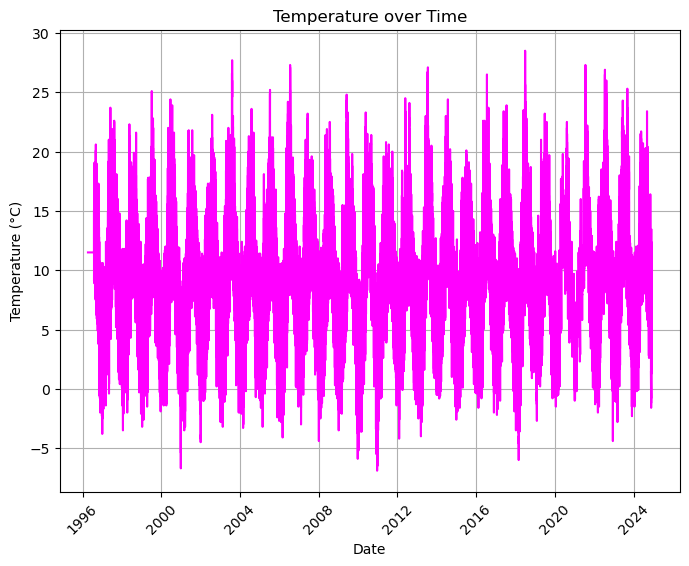

In [325]:
# Temperature over time
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='date', y='temp', color = 'magenta')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.xticks(rotation=45)
plt.grid(True)
plt.title('Temperature over Time')
plt.savefig('img/temperature')

Mean Temperature

In [326]:
# Calculate the daily mean temperature
df['Daily_Mean_Temperature'] = df['temp'].resample('D').transform('mean')

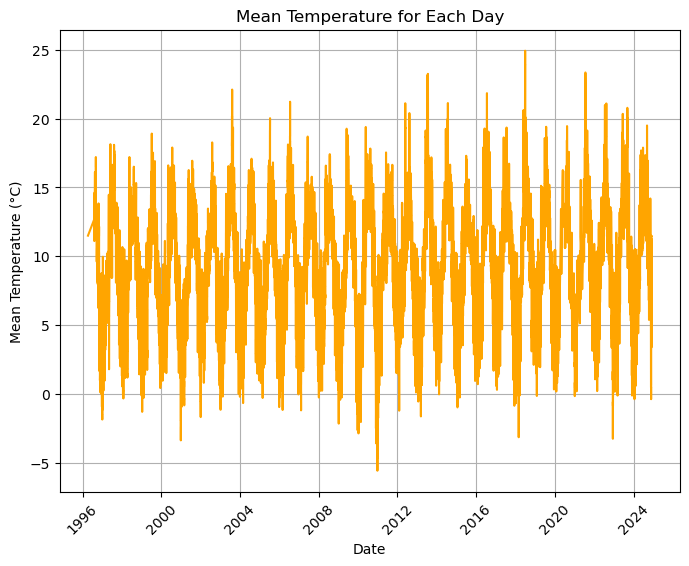

In [327]:

# Plot the Daily Mean Temperature
plt.figure(figsize=(8, 6))
sns.lineplot(x='date', y='Daily_Mean_Temperature', data=df, color='orange')
plt.title('Mean Temperature for Each Day')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')

plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('img/daily_mean_temperature')

Monthly Mean Temperature

In [328]:
# Calculate monthly mean temperature
monthly_mean_temperature = df["temp"].resample("ME").mean()

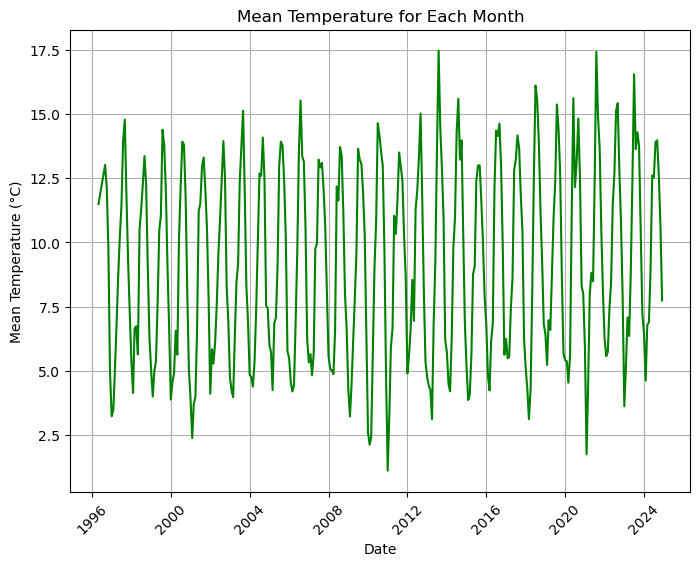

In [329]:
# Plot the Monthly Mean Temperature
plt.figure(figsize=(8, 6))
sns.lineplot(x = monthly_mean_temperature.index, y = monthly_mean_temperature, color='green')
plt.title('Mean Temperature for Each Month')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')


plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('img/monthly_mean_temp')

### Plot the Windspeed Data

Change data type to floats.

In [330]:
# Convert windspeed to floats
df['wdsp'] = df['wdsp'].astype(float)

Windspeed over time.

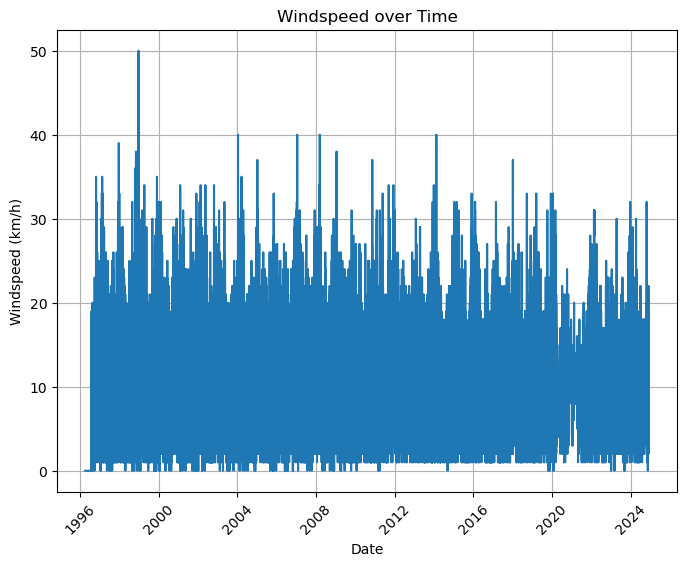

In [331]:
# Plot windspeed over time
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='date', y='wdsp')
plt.xlabel('Date')
plt.ylabel('Windspeed (km/h)')

plt.xticks(rotation=45)
plt.grid(True)
plt.title('Windspeed over Time')
plt.savefig('img/windspeed_over_time')

Rolling windspeed.

`DataFrame.rolling()`: for rolling window calculation
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

In [332]:
# Calculate rolling windspeed (24-hour window)
df['Rolling_Windspeed'] = df['wdsp'].rolling(window=24, min_periods=1).mean()

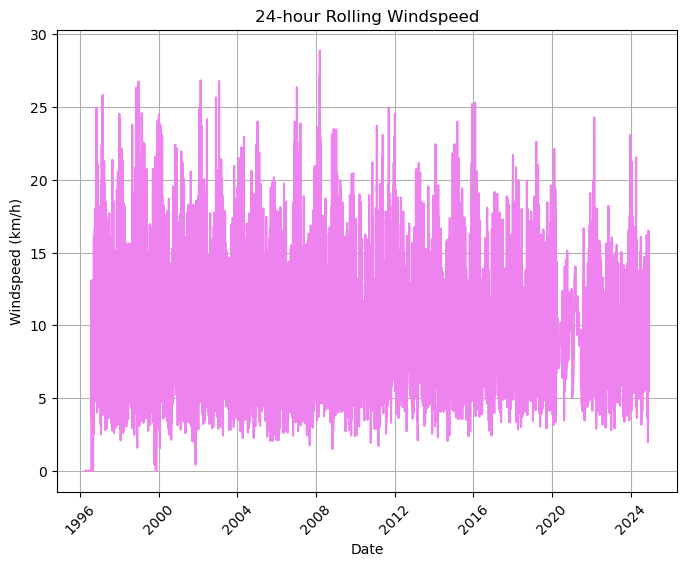

In [333]:
# Plot rolling windspeed over 24 hours
plt.figure(figsize=(8, 6))
sns.lineplot(x='date', y='Rolling_Windspeed', data=df, color='violet')
plt.title('24-hour Rolling Windspeed')
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Windspeed (km/h)')
plt.grid(True)
plt.savefig('img/24hr_rolling_windspeed')


Maximum windspeed for each day.
`dataframe.resample()` allows you to change the frequency of your time series data.

In [334]:
# Calculate the maximum windspeed per day.
df['Max_Windspeed_Per_Day'] =  df['wdsp'].resample('D').max()

In [335]:
print(df.isna().sum())

ind                            0
rain                           0
ind.1                          0
temp                           0
ind.2                          0
wetb                           0
dewpt                          0
vappr                          0
rhum                           0
msl                            0
ind.3                          0
wdsp                           0
ind.4                          0
wddir                          0
ww                             0
w                              0
sun                            0
vis                            0
clht                           0
clamt                          0
Daily_Mean_Temperature         0
Rolling_Windspeed              0
Max_Windspeed_Per_Day     180894
dtype: int64


In [336]:
df.dropna(inplace = True)

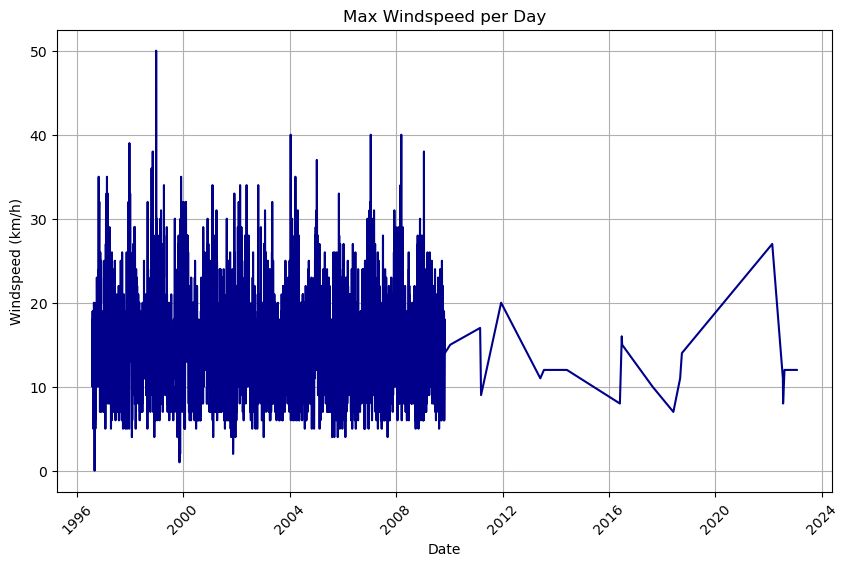

In [ ]:
# Plot the maximum windspeed per day.
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='Max_Windspeed_Per_Day', data=df, color='darkblue')
plt.xlabel('Date')
plt.ylabel('Windspeed (km/h)')

plt.title('Max Windspeed per Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('img/daily_max_windspeed')


Monthly mean of daily max windspeed.

In [337]:
df['Monthly_Mean_Windspeed'] = df['Max_Windspeed_Per_Day'].resample('ME').mean()


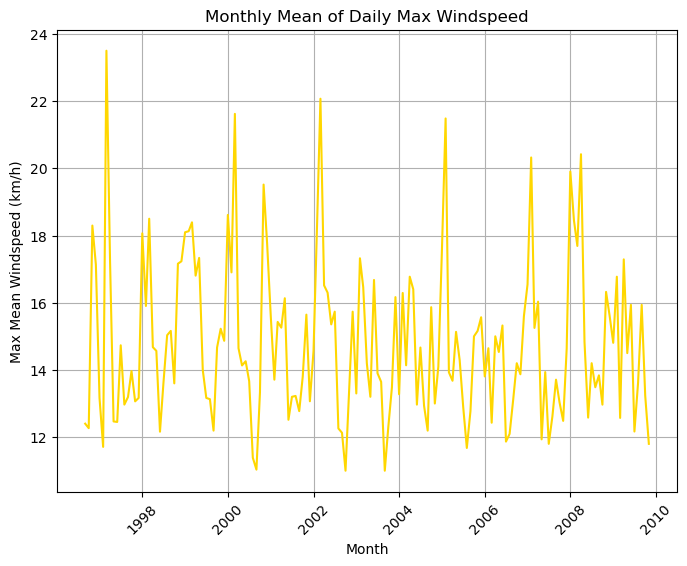

In [292]:
# Plot the Monthly Mean of Daily Max Windspeed
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='date', y='Monthly_Mean_Windspeed', color='gold')
plt.xlabel('Date')
plt.ylabel('Max Mean Windspeed (km/h)')

plt.title('Monthly Mean of Daily Max Windspeed')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('img/monthly_mean_maxspeed')


## End